In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
scom_df = pd.read_csv('./output_files/SCom_stocks.csv')
scom_df.head()

,id,close,high,low,open,vp,vwap,previous,volume,DATE
0,60f7c017b6c609ad7cd0e2fe,42.60,42.70,42.50,42.5,0.0,42.60,42.60,76700,2021-07-21
1,60f5322eb6c609ad7cce4a07,42.60,42.90,41.75,42.9,0.0,42.60,42.60,5471700,2021-07-19
2,60f12897b6c609ad7cca854f,42.60,42.90,42.30,42.9,0.0,42.60,42.60,7553700,2021-07-16
3,60efd717b6c609ad7cc905f0,42.60,42.95,41.55,42.2,0.0,42.60,41.75,3754200,2021-07-15
4,60ee8597b6c609ad7cc79947,41.75,42.40,41.20,41.5,0.0,41.75,41.20,1736900,2021-07-14


In [3]:
scom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1707 non-null   object 
 1   close     1707 non-null   float64
 2   high      1707 non-null   float64
 3   low       1707 non-null   float64
 4   open      1707 non-null   float64
 5   vp        1707 non-null   float64
 6   vwap      1707 non-null   float64
 7   previous  1707 non-null   float64
 8   volume    1707 non-null   int64  
 9   DATE      1707 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 133.5+ KB


In [4]:
#transform date  dtype  object to date
scom_df.rename(columns = {'DATE': 'date'}, inplace=True)
scom_df['date'] = pd.to_datetime(scom_df['date'])
scom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        1707 non-null   object        
 1   close     1707 non-null   float64       
 2   high      1707 non-null   float64       
 3   low       1707 non-null   float64       
 4   open      1707 non-null   float64       
 5   vp        1707 non-null   float64       
 6   vwap      1707 non-null   float64       
 7   previous  1707 non-null   float64       
 8   volume    1707 non-null   int64         
 9   date      1707 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 133.5+ KB


In [5]:
scom_df.drop(columns = ['id', 'vp'], inplace = True)

In [6]:
print(scom_df.shape)
scom_df.head()

(1707, 8)


,close,high,low,open,vwap,previous,volume,date
0,42.60,42.70,42.50,42.5,42.60,42.60,76700,2021-07-21
1,42.60,42.90,41.75,42.9,42.60,42.60,5471700,2021-07-19
2,42.60,42.90,42.30,42.9,42.60,42.60,7553700,2021-07-16
3,42.60,42.95,41.55,42.2,42.60,41.75,3754200,2021-07-15
4,41.75,42.40,41.20,41.5,41.75,41.20,1736900,2021-07-14


In [7]:
mask = (scom_df['date'] > '2019-01-01') & (scom_df['date'] <= '2021-07-31')
scom_df = scom_df.loc[mask]
scom_df.shape

(620, 8)

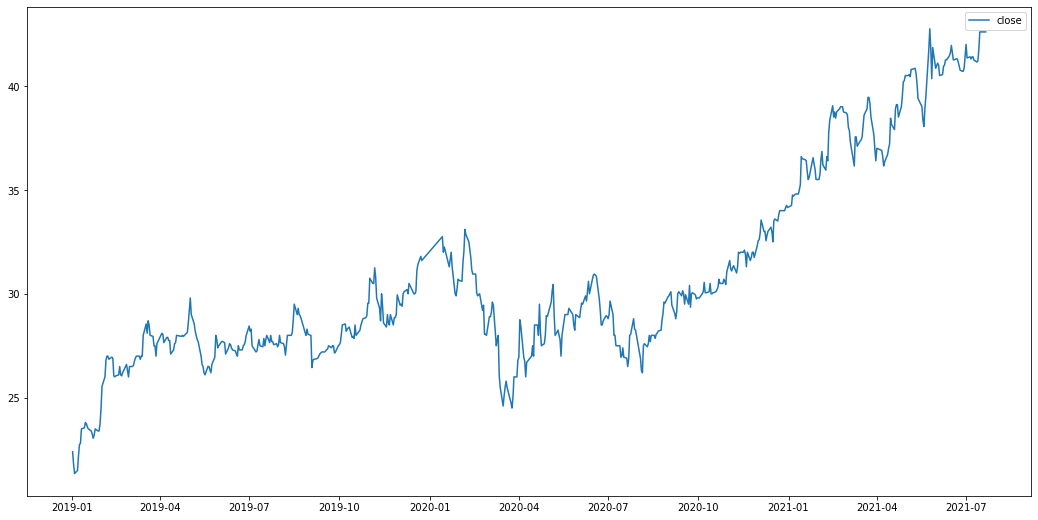

In [17]:
scom_df = scom_df.sort_values(['date'])
plt.figure(figsize = (18,9))
plt.plot(scom_df['date'],scom_df['close'],label = 'close')
plt.legend()
plt.show()

In [29]:
data = scom_df.sort_index(ascending=True,axis=0)
df = pd.DataFrame(index=range(0,len(data)),columns=['date','close'])
for i in range(0,len(data)):
    df["date"][i]=data['date'][i]
    df["close"][i]=data["close"][i]

df.index=df.date
df.drop("date",axis=1,inplace=True)
print(df.shape)
df.head()

(620, 1)


,close
date,
2021-07-21,42.6
2021-07-19,42.6
2021-07-16,42.6
2021-07-15,42.6
2021-07-14,41.75


In [30]:
#Defining Function

def EMA(data, window_size):
    new_data = data
    new_data = pd.Series(new_data["close"])

    #Calculating Exponential Moving average for a given time period
    exponential_ma = new_data.ewm(span = window_size, adjust = False).mean()
    #Parsing the results as a new column in the existing data frame
    data["EMA"] = exponential_ma

    return data

In [31]:
EMA(df,30)
df.head()

,close,EMA
date,,
2021-07-21,42.6,42.600000
2021-07-19,42.6,42.600000
2021-07-16,42.6,42.600000
2021-07-15,42.6,42.600000
2021-07-14,41.75,42.545161


KeyError: "['Exponential_MA'] not in index"

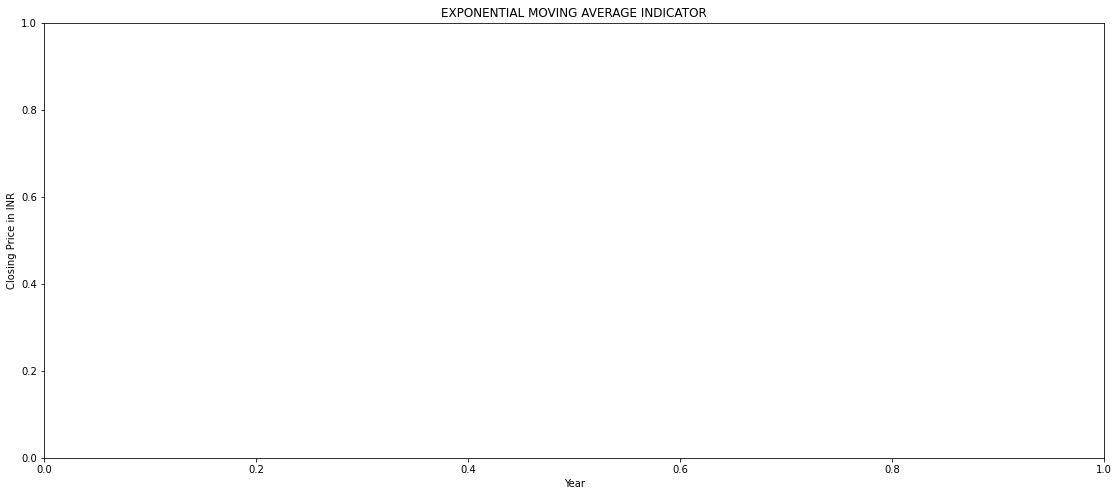

In [32]:
#Plotting Exponential Moving Average wrt to Closing Price

#Setting labels
plt.figure(figsize=(19,8))
plt.xlabel("Year")

plt.ylabel("Closing Price in INR")
plt.title("EXPONENTIAL MOVING AVERAGE INDICATOR")

#Let's go
plt.plot(df[['close', 'Exponential_MA']])
plt.legend(["Closing Price","EMA"], loc ="lower right")
plt.show()